In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data

df=pd.read_csv(r'C:\Users\kusia\OneDrive\Desktop\Data lessons\Alex Utube Projects\Python\movies.csv')

In [5]:
# Looking at the Data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [38]:
# finding missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%
yearcorrect - 0%


In [9]:
# Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [3]:
df = df.sort_values(by=['gross'], inplace=False)

In [ ]:
# Drop any duplicates



In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000.0,309.0,Daybreak,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,596.0,DENTSU Music And Entertainment,134.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,NaN,682.0,Roxwell Films,93.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,NaN,790.0,Visual Arts Entertainment,104.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,NaN,1400.0,British Broadcasting Corporation (BBC),103.0


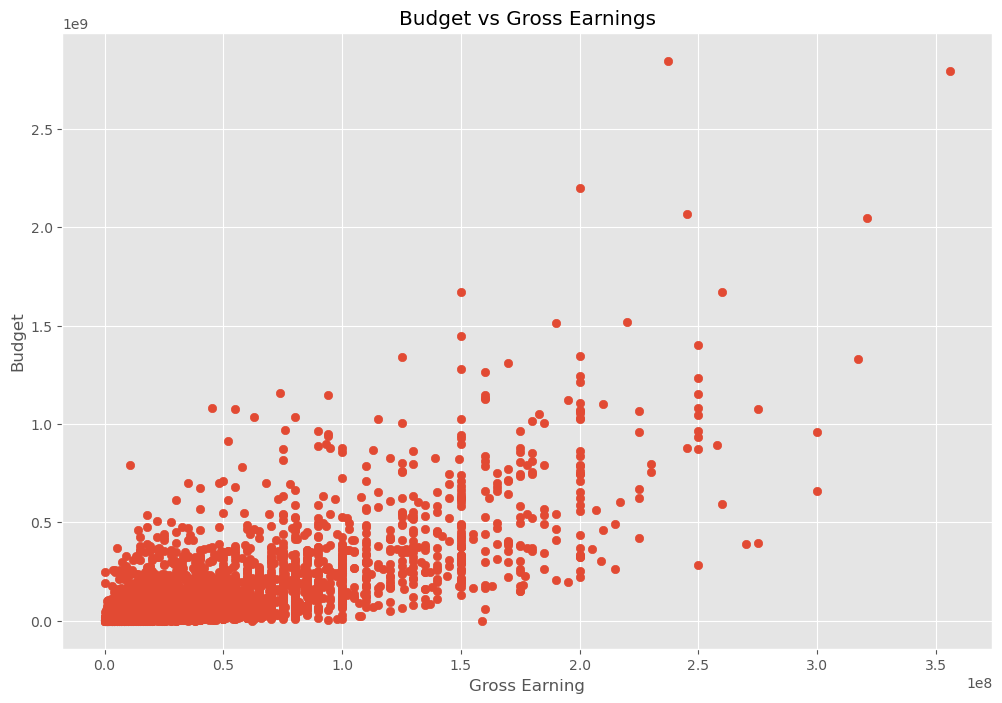

In [49]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earning')

plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

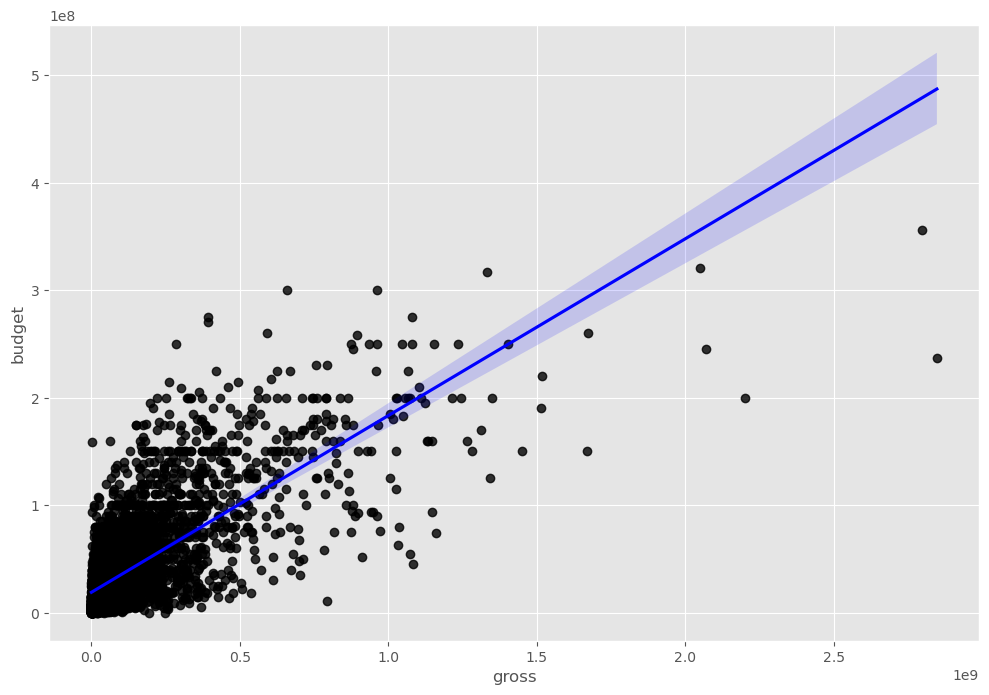

In [51]:
# Plot Budget vs Gross using Seaborn

sns.regplot(x="gross", y="budget", data=df,  scatter_kws={"color":"black"}, line_kws={"color":"blue"})

In [52]:
# Correlation Matrix between numeric columns

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,1.000000
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.097995
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.222945
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.329321
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.257486
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120811
yearcorrect,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,1.000000


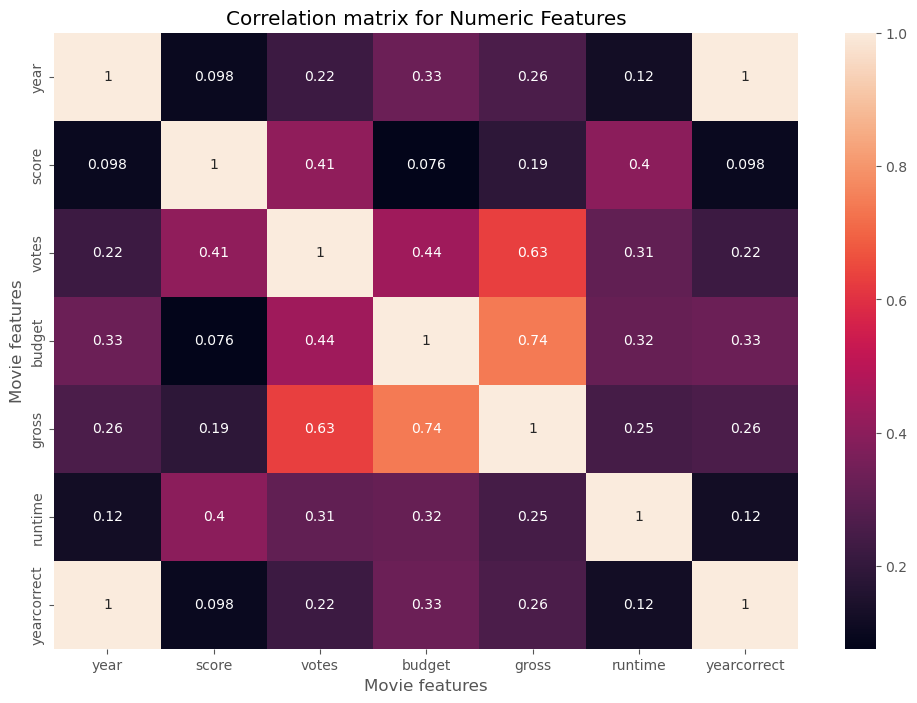

In [53]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [1]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

NameError: name 'df' is not defined

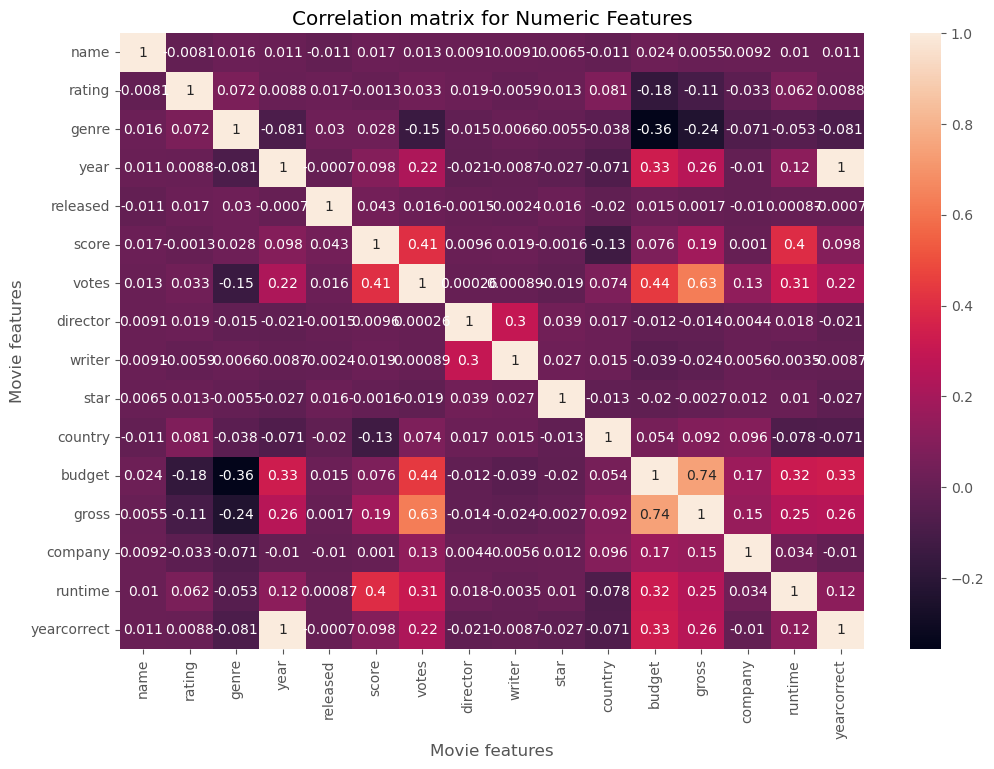

In [56]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [57]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             yearcorrect    0.011453
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [58]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        budget        -0.356564
budget       genre         -0.356564
gross        genre         -0.235650
genre        gross         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.133348
score        country       -0.133348
gross        rating        -0.107339
rating       gross         -0.107339
genre        yearcorrect   -0.081261
yearcorrect  genre         -0.081261
year         genre         -0.081261
genre        year          -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
yearcorrect  country       -0.070938
country      yearcorrect   -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
budget       writer        -0.039451
w

In [59]:
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]

print(high_corr)

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
yearcorrect  year           1.000000
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         yearcorrect    1.000000
             year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [69]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [70]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                                            year              
"DIA" Productions GmbH & Co. KG                    2003  4.435093e+07
"Weathering With You" Film Partners                2019  1.934575e+08
.406 Production                                    1996  1.058000e+04
1+2 Seisaku Iinkai                                 2000  1.196218e+06
10 West Studios                                    2010  8.149060e+05
120 Films                                          2002  6.479328e+06
120dB Films                                        2009  2.667600e+04
                                                   2016  3.683720e+05
13 Productions                                     2000  2.546100e+04
1492 Pictures                                      1996  1.298324e+08
                                                   1999  8.742386e+07
1818 Productions                                   1983  1.223263e+07
19 Entertainment                                   2003  4.928883e+06
1978 Films                                         2017  4.065640e+07
1984 Private Defense Contractors                   2014  5.883438e+07
1992 Number Four Limited Partnership               1995  4.686937e+06
2 Loop Films                                       2002  2.643490e+05
2.0 Entertainment                                  2019  1.228104e+08
2.4.7. Films                                       2007  2.278398e+07
2003 Productions                                   2004  6.942439e+07
20th Century Studios                               2020  1.111055e+08
21 Laps Entertainment                              2014  4.129632e+07
                                                   2018  4.114238e+07
21st Century Film Corporation                      1989  3.953745e+06
                                                   1990  7.658401e+06
21st Century Films                                 1994  1.702394e+06
25th Hour Productions                              2002  2.393206e+07
26 Films                                           2009  2.045887e+07
2929 Productions                                   2007  7.248490e+06
                                                   2008  2.870518e+07
                                                   2014  5.092129e+06
2DUX²                                              2016  6.781500e+05
                                                   2018  1.977444e+08
3 Arts Entertainment                               1996  6.020933e+07
                                                   1997  7.581243e+07
                                                   2001  7.118650e+07
                                                   2010  6.496260e+05
                                                   2013  3.909596e+06
                                                   2014  1.614593e+08
                                                   2015  3.660674e+07
                                                   2019  2.238656e+07
3 Miles Apart Productions Ltd.                     1999  8.408835e+06
3311 Productions                                   2013  3.114953e+06
                                                   2017  5.042014e+06
360 Pictures                                       2007  9.669758e+06
391 Productions                                    1998  1.960216e+06
                                                   1999  9.244200e+04
3B Productions                                     1999  0.000000e+00
                                                   2003  1.679990e+05
3Mark Entertainment                                2001  4.760014e+06
4 1/2 Film                                         2006  1.297260e+06
4 Kids Entertainment                               1999  1.339493e+08
40 Acres & A Mule Filmworks                        1986  7.137502e+06
                                                   1989  3.729544e+07
                                                   1995  1.540344e+07
                                                   1999  3.457378e+07
    